# Anomaly Detection & Time Series Assignment Solutions (DA-AG-018)


## Question 1: What is Anomaly Detection?
- **Definition**: Process of identifying data points that deviate significantly from normal patterns.
- **Types**:
  - **Point anomalies**: Single data points very different from rest (e.g., fraudulent transaction).
  - **Contextual anomalies**: Data abnormal in a specific context (e.g., high temp in winter).
  - **Collective anomalies**: Group of points anomalous together (e.g., sudden network traffic spike).


## Question 2: Compare Isolation Forest, DBSCAN, and LOF
- **Isolation Forest**: Tree-based, isolates anomalies quickly. Works for high-dimensional datasets.
- **DBSCAN**: Density-based, anomalies = noise points. Good for spatial/geographical data.
- **LOF**: Measures local density deviation. Good for datasets with varying densities.

## Question 3: Key Components of Time Series
- **Trend**: Long-term increase/decrease (e.g., rising stock price).
- **Seasonality**: Repeating patterns (e.g., sales higher in December).
- **Cyclic**: Fluctuations not fixed (e.g., economic cycles).
- **Residual/Noise**: Random variation.

## Question 4: Stationary Series
- **Definition**: Statistical properties (mean, variance) constant over time.
- **Test**: Augmented Dickey-Fuller (ADF) test.
- **Transform**: Differencing, log transform, seasonal differencing.

## Question 5: AR, MA, ARIMA, SARIMA, SARIMAX
- **AR**: Autoregressive, past values.
- **MA**: Moving average of past errors.
- **ARIMA**: Combines AR + MA + differencing.
- **SARIMA**: Adds seasonality.
- **SARIMAX**: Adds exogenous variables.

/tmp/ipython-input-174269680.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


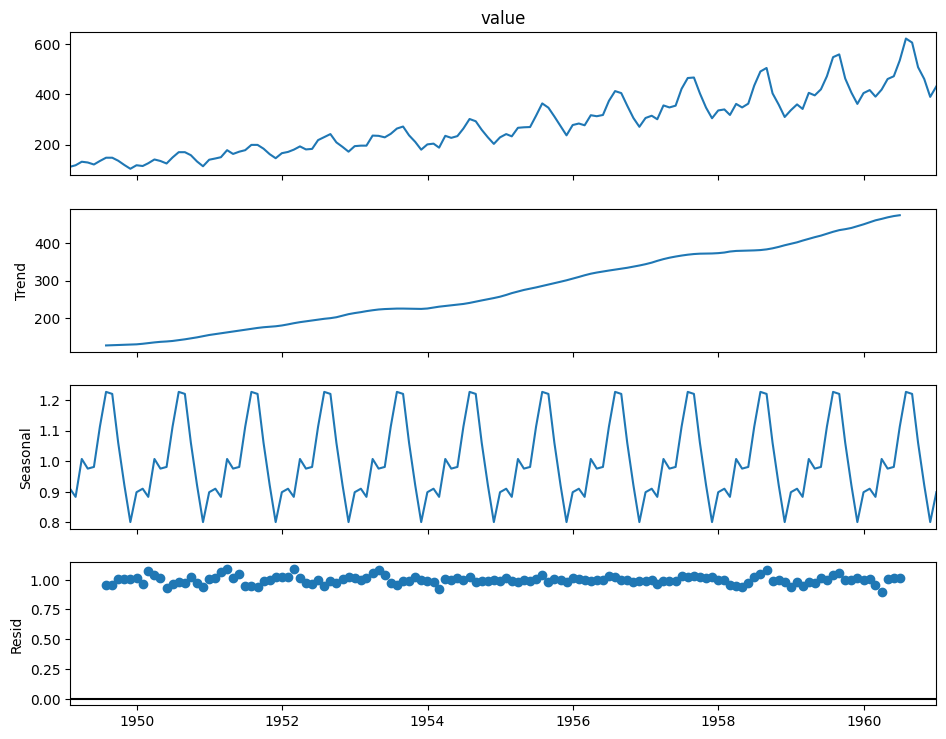

In [5]:
## Question 6
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Load AirPassengers dataset from R datasets
data = sm.datasets.get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data = data.set_index('Month')

# Convert to time series
series = data['value']

# Decompose
decomposition = sm.tsa.seasonal_decompose(series, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()


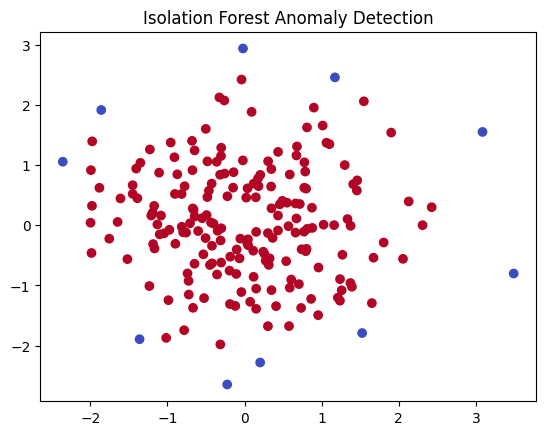

In [2]:
## Question 7
import numpy as np
from sklearn.ensemble import IsolationForest

# Synthetic example (NYC taxi fare requires dataset download)
X = np.random.randn(200, 2)
iso = IsolationForest(contamination=0.05)
y_pred = iso.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

/tmp/ipython-input-1166573520.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


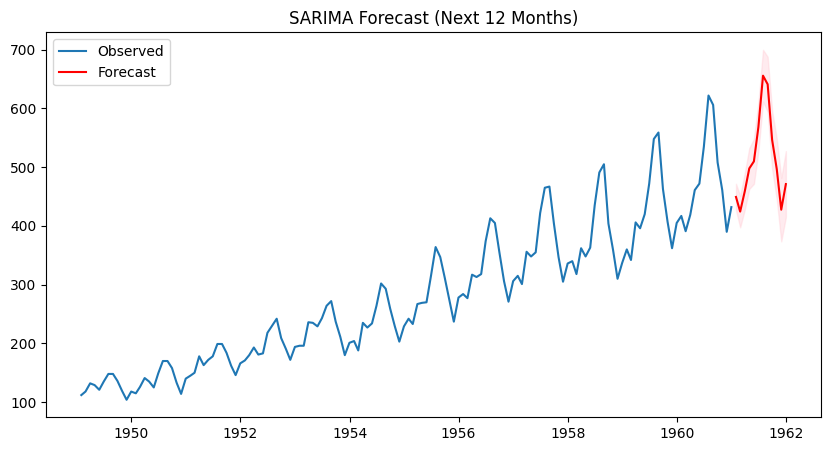

In [6]:
## Question 8
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load AirPassengers dataset
data = sm.datasets.get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data = data.set_index('Month')
series = data['value']

# Train SARIMA model
model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot observed and forecasted values
plt.figure(figsize=(10,5))
plt.plot(series, label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast (Next 12 Months)')
plt.show()


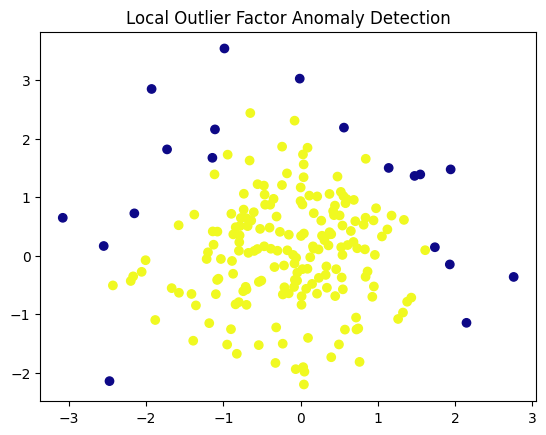

In [4]:
## Question 9
from sklearn.neighbors import LocalOutlierFactor

X = np.random.randn(200, 2)
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='plasma')
plt.title('Local Outlier Factor Anomaly Detection')
plt.show()

## Question 10: Real-world Workflow (Power Grid)
- **Anomaly detection**: Isolation Forest for spikes/drops.
- **Forecasting**: SARIMAX (includes weather, region as exogenous vars).
- **Validation**: Train-test split, rolling forecast origin, monitor residuals.
- **Business benefit**: Detect faults early, manage load, prevent outages.